## Chess Project

## About the Dataset:


This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. This set contains the:

- Game ID




- Rated (T/F)




- Start Time


- End Time


- Number of Turns


- Game Status


- Winner


- Time Increment


- White Player ID


- White Player Rating


- Black Player ID


- Black Player Rating


- All Moves in Standard Chess Notation


- Opening Eco (Standardised Code for any given opening, list here)


- Opening Name


Opening Ply (Number of moves in the opening phase)
For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

# Possible Uses

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('games.csv')
display(df.head(3))

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [8]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [10]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [12]:
# We notice that white_id, black_id and the id columns give no information, so we drop them
df.drop(['id', 'white_id', 'black_id'], axis=1, inplace=True)
df.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [14]:
# perform label encoding on boolen column
df['rated'] = df['rated'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  int32  
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_rating    20058 non-null  int64  
 8   black_rating    20058 non-null  int64  
 9   moves           20058 non-null  object 
 10  opening_eco     20058 non-null  object 
 11  opening_name    20058 non-null  object 
 12  opening_ply     20058 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 1.9+ MB


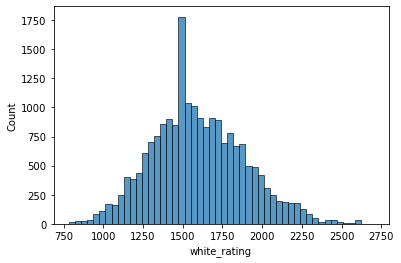

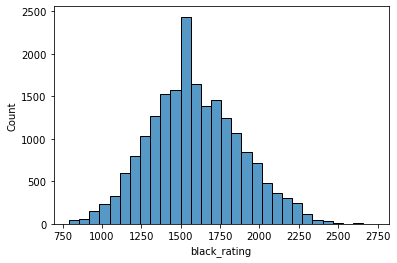

In [15]:
plt.figure()
sns.histplot(x='white_rating', bins= 50 ,data=df);
plt.show()
plt.figure()
sns.histplot(x='black_rating', bins= 30 ,data=df);
plt.show()

In [16]:
df['moves'].apply(lambda x: len(x.split(' '))).describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: moves, dtype: float64

In [18]:
df['moves_num'] = df['moves'].apply(lambda x: len(x.split(' ')))
df.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,moves_num
0,0,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,13
1,1,1.504130e+12,1.504130e+12,16,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,16
2,1,1.504130e+12,1.504130e+12,61,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,61


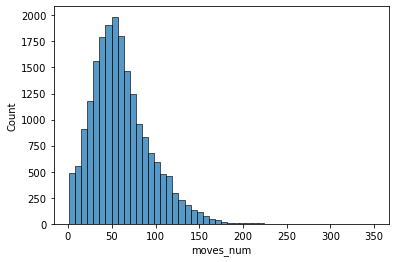

In [19]:

plt.figure()
sns.histplot(x='moves_num', bins= 50 ,data=df);
plt.show()

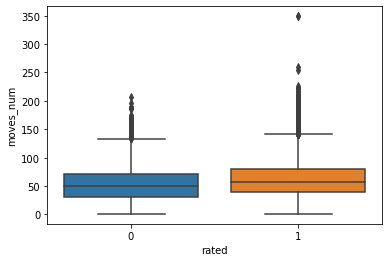

In [20]:
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [21]:
# The max number of moves in proffinal chess is less than 150, so we drop all outliers games
Q1 = df['moves_num'].quantile(q=0.25) 
Q3 = df['moves_num'].quantile(q=0.75)

IQR = Q3 - Q1

df.drop(df[df['moves_num'] >= Q3 + 1.5*IQR].index, inplace=True)


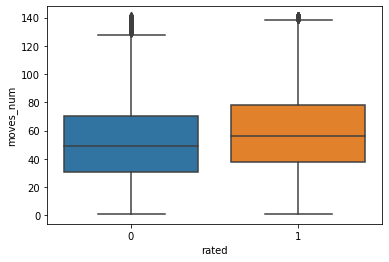

In [22]:
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [29]:
df['period'] = df['last_move_at'] - df['created_at']
df['period'].describe() 

count    1.960700e+04
mean     8.559057e+05
std      4.854707e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.323870e+05
75%      7.782045e+05
max      6.058447e+08
Name: period, dtype: float64

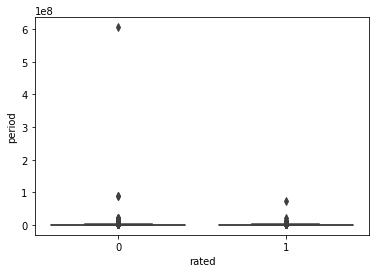

In [34]:
plt.figure()
sns.boxplot(y = 'period', x = 'rated', data = df)
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19607 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           19607 non-null  int32  
 1   created_at      19607 non-null  float64
 2   last_move_at    19607 non-null  float64
 3   turns           19607 non-null  int64  
 4   victory_status  19607 non-null  object 
 5   winner          19607 non-null  object 
 6   increment_code  19607 non-null  object 
 7   white_rating    19607 non-null  int64  
 8   black_rating    19607 non-null  int64  
 9   moves           19607 non-null  object 
 10  opening_eco     19607 non-null  object 
 11  opening_name    19607 non-null  object 
 12  opening_ply     19607 non-null  int64  
 13  moves_num       19607 non-null  int64  
 14  period          19607 non-null  float64
dtypes: float64(3), int32(1), int64(5), object(6)
memory usage: 2.3+ MB


In [39]:
# Normalizing numerical columns in the dataset
from sklearn.preprocessing import normalize

num_columns = df.select_dtypes(exclude=['object']).columns

df[num_columns] = normalize(df[num_columns])
df.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,moves_num,period
0,0.000000e+00,0.707107,0.707107,6.111107e-12,outoftime,white,15+2,7.051277e-10,5.598714e-10,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,2.350426e-12,6.111107e-12,0.0
1,4.701102e-13,0.707107,0.707107,7.521762e-12,resign,black,5+10,6.214856e-10,5.928089e-10,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,1.880441e-12,7.521762e-12,0.0
2,4.701102e-13,0.707107,0.707107,2.867672e-11,mate,white,5+10,7.032848e-10,7.051652e-10,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,1.410330e-12,2.867672e-11,0.0
3,4.701164e-13,0.707107,0.707107,2.867710e-11,mate,white,20+0,6.764975e-10,6.835492e-10,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,1.410349e-12,2.867710e-11,0.0
4,4.701414e-13,0.707107,0.707107,4.466343e-11,mate,white,30+3,7.160254e-10,6.906377e-10,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,2.350707e-12,4.466343e-11,0.0


In [40]:
df.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_rating', 'black_rating', 'moves',
       'opening_eco', 'opening_name', 'opening_ply', 'moves_num', 'period'],
      dtype='object')